# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

To enable interactive image visualization in Jupyter Notebook, the 'ipywidgets' package is required

In [3]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 32.1 MB/s eta 0:00:01
ERROR: comm 0.1.3 has requirement traitlets>=5.3, but you'll have traitlets 4.3.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Define transforms
# Create training set and define training dataloader
# Create test set and define test dataloader

# Define the data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize data to range [-1, 1]
])

# Load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I chose two pre-processing steps: 'ToTensor()' and 'Normalize()'. 'ToTensor()' converts the images from numpy arrays to PyTorch tensors. 'Normalize()' standardizes the pixel values to have a mean of 0.5 and a standard deviation of 0.5, which helps the neural network converge faster during training.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


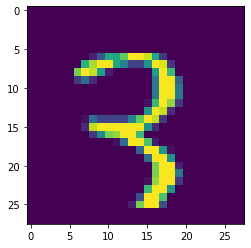

8


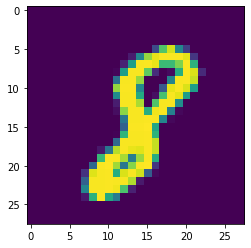

1


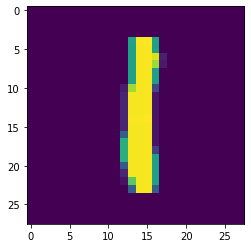

3


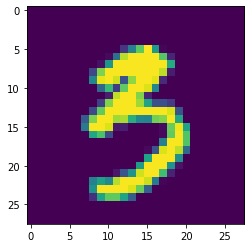

3


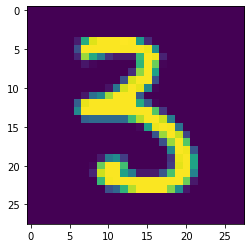

In [5]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # Output layer with 10 classes (digits 0 to 9)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = MNISTClassifier()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 250 == 249:  # Print loss every 250 batches
            print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/250:.4f}")
            running_loss = 0.0

    train_losses.append(running_loss / len(train_loader))

print("Training completed!")

Epoch 1, Batch 250, Loss: 0.5287
Epoch 1, Batch 500, Loss: 0.2745
Epoch 1, Batch 750, Loss: 0.2051
Epoch 2, Batch 250, Loss: 0.1533
Epoch 2, Batch 500, Loss: 0.1402
Epoch 2, Batch 750, Loss: 0.1323
Epoch 3, Batch 250, Loss: 0.1056
Epoch 3, Batch 500, Loss: 0.1021
Epoch 3, Batch 750, Loss: 0.0985
Epoch 4, Batch 250, Loss: 0.0859
Epoch 4, Batch 500, Loss: 0.0790
Epoch 4, Batch 750, Loss: 0.0834
Epoch 5, Batch 250, Loss: 0.0632
Epoch 5, Batch 500, Loss: 0.0642
Epoch 5, Batch 750, Loss: 0.0787
Epoch 6, Batch 250, Loss: 0.0593
Epoch 6, Batch 500, Loss: 0.0568
Epoch 6, Batch 750, Loss: 0.0609
Epoch 7, Batch 250, Loss: 0.0532
Epoch 7, Batch 500, Loss: 0.0567
Epoch 7, Batch 750, Loss: 0.0582
Epoch 8, Batch 250, Loss: 0.0447
Epoch 8, Batch 500, Loss: 0.0564
Epoch 8, Batch 750, Loss: 0.0448
Epoch 9, Batch 250, Loss: 0.0385
Epoch 9, Batch 500, Loss: 0.0396
Epoch 9, Batch 750, Loss: 0.0520
Epoch 10, Batch 250, Loss: 0.0361
Epoch 10, Batch 500, Loss: 0.0420
Epoch 10, Batch 750, Loss: 0.0391
Trainin

Plot the training loss (and validation loss/accuracy, if recorded).

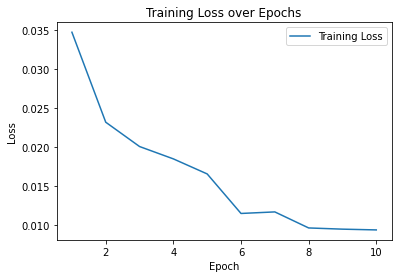

In [9]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
def test_model(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Test the model on the test dataset
test_accuracy = test_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.02%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

### Tweaking model architecture
Increasing hidden units and layers, and experimenting with activation functions

In [11]:
class MNISTImprovedClassifier(nn.Module):
    def __init__(self):
        super(MNISTImprovedClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1024)  # Increase hidden units
        self.fc2 = nn.Linear(1024, 512)     # Increase hidden units
        self.fc3 = nn.Linear(512, 256)      # Increase hidden units
        self.fc4 = nn.Linear(256, 10)       # Output layer with 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))   # Experiment with activation functions
        x = F.relu(self.fc2(x))   # Experiment with activation functions
        x = F.relu(self.fc3(x))   # Experiment with activation functions
        x = self.fc4(x)
        return x

model = MNISTImprovedClassifier()

In [12]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 250 == 249:  # Print loss every 250 batches
            print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/250:.4f}")
            running_loss = 0.0

    train_losses.append(running_loss / len(train_loader))

print("Training completed!")

Epoch 1, Batch 250, Loss: 0.5222
Epoch 1, Batch 500, Loss: 0.2527
Epoch 1, Batch 750, Loss: 0.2023
Epoch 2, Batch 250, Loss: 0.1500
Epoch 2, Batch 500, Loss: 0.1402
Epoch 2, Batch 750, Loss: 0.1232
Epoch 3, Batch 250, Loss: 0.1143
Epoch 3, Batch 500, Loss: 0.1035
Epoch 3, Batch 750, Loss: 0.1023
Epoch 4, Batch 250, Loss: 0.0801
Epoch 4, Batch 500, Loss: 0.0905
Epoch 4, Batch 750, Loss: 0.0853
Epoch 5, Batch 250, Loss: 0.0656
Epoch 5, Batch 500, Loss: 0.0781
Epoch 5, Batch 750, Loss: 0.0752
Epoch 6, Batch 250, Loss: 0.0628
Epoch 6, Batch 500, Loss: 0.0631
Epoch 6, Batch 750, Loss: 0.0706
Epoch 7, Batch 250, Loss: 0.0466
Epoch 7, Batch 500, Loss: 0.0587
Epoch 7, Batch 750, Loss: 0.0609
Epoch 8, Batch 250, Loss: 0.0524
Epoch 8, Batch 500, Loss: 0.0505
Epoch 8, Batch 750, Loss: 0.0547
Epoch 9, Batch 250, Loss: 0.0467
Epoch 9, Batch 500, Loss: 0.0426
Epoch 9, Batch 750, Loss: 0.0518
Epoch 10, Batch 250, Loss: 0.0361
Epoch 10, Batch 500, Loss: 0.0403
Epoch 10, Batch 750, Loss: 0.0467
Trainin

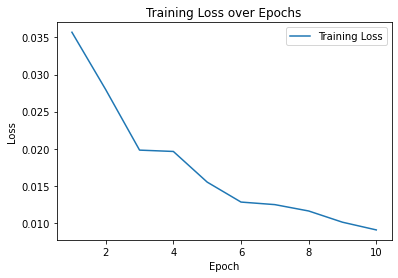

In [14]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [15]:
def test_model(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Test the model on the test dataset
test_accuracy = test_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.52%


The accuracy slightly improved from 97.02 to 97.52

### Batch Normalization

In [16]:
class MNISTImprovedClassifier(nn.Module):
    def __init__(self):
        super(MNISTImprovedClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.bn1 = nn.BatchNorm1d(1024)  # Add batch normalization
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)   # Add batch normalization
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)   # Add batch normalization
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.bn1(self.fc1(x)))  # Apply batch normalization after activation
        x = F.relu(self.bn2(self.fc2(x)))  # Apply batch normalization after activation
        x = F.relu(self.bn3(self.fc3(x)))  # Apply batch normalization after activation
        x = self.fc4(x)
        return x

model = MNISTImprovedClassifier()

In [17]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 250 == 249:  # Print loss every 250 batches
            print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/250:.4f}")
            running_loss = 0.0

    train_losses.append(running_loss / len(train_loader))

print("Training completed!")

Epoch 1, Batch 250, Loss: 0.2965
Epoch 1, Batch 500, Loss: 0.1632
Epoch 1, Batch 750, Loss: 0.1426
Epoch 2, Batch 250, Loss: 0.0867
Epoch 2, Batch 500, Loss: 0.0867
Epoch 2, Batch 750, Loss: 0.0885
Epoch 3, Batch 250, Loss: 0.0601
Epoch 3, Batch 500, Loss: 0.0624
Epoch 3, Batch 750, Loss: 0.0619
Epoch 4, Batch 250, Loss: 0.0501
Epoch 4, Batch 500, Loss: 0.0485
Epoch 4, Batch 750, Loss: 0.0502
Epoch 5, Batch 250, Loss: 0.0390
Epoch 5, Batch 500, Loss: 0.0349
Epoch 5, Batch 750, Loss: 0.0376
Epoch 6, Batch 250, Loss: 0.0339
Epoch 6, Batch 500, Loss: 0.0260
Epoch 6, Batch 750, Loss: 0.0374
Epoch 7, Batch 250, Loss: 0.0219
Epoch 7, Batch 500, Loss: 0.0267
Epoch 7, Batch 750, Loss: 0.0329
Epoch 8, Batch 250, Loss: 0.0224
Epoch 8, Batch 500, Loss: 0.0235
Epoch 8, Batch 750, Loss: 0.0255
Epoch 9, Batch 250, Loss: 0.0182
Epoch 9, Batch 500, Loss: 0.0196
Epoch 9, Batch 750, Loss: 0.0280
Epoch 10, Batch 250, Loss: 0.0161
Epoch 10, Batch 500, Loss: 0.0193
Epoch 10, Batch 750, Loss: 0.0240
Trainin

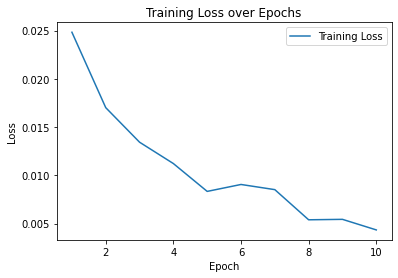

In [19]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [20]:
def test_model(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Test the model on the test dataset
test_accuracy = test_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.73%


##### Model Accuracy improved slightly from 97.02% to 97.73%

## Saving your model
Using `torch.save`, save your model for future loading.

In [21]:
# Save the model to a file
torch.save(model.state_dict(), 'mnist_classifier.pth')
print("Model saved successfully.")

Model saved successfully.
